In [18]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import datasets, models, layers
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [19]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [20]:
X_train.shape

(60000, 28, 28)

In [21]:
y_train.shape

(60000,)

In [22]:
X_test.shape

(10000, 28, 28)

In [23]:
y_test.shape

(10000,)

In [24]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [25]:
def plot_sample(X, y, index):
  plt.figure(figsize=(20,10))
  plt.imshow(X[index])
  plt.xlabel(y[index])

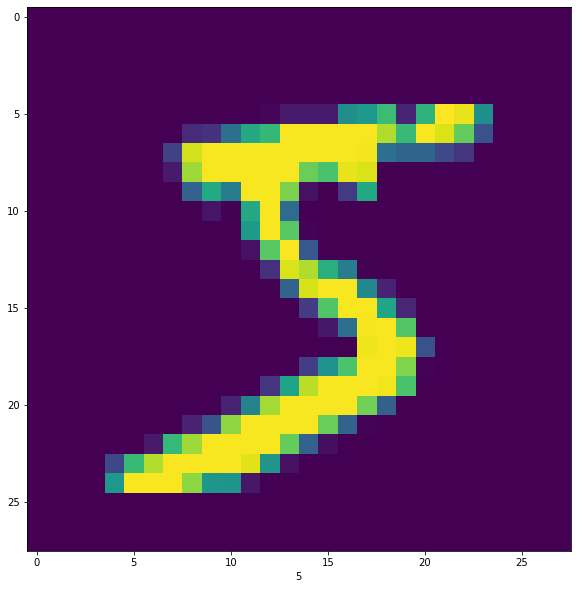

In [26]:
plot_sample(X_train, y_train, 0)

In [27]:
# normalizing the data
X_train = X_train / 255.0
X_test = X_test / 255.0

**ANN model**

In [28]:
ann = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(100, activation= "relu"),
    layers.Dense(10, activation = "sigmoid")
])

ann.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

ann.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2763 - accuracy: 0.9207
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1246 - accuracy: 0.9629
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0860 - accuracy: 0.9743
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0655 - accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0520 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0414 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0335 - accuracy: 0.9898
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0271 - accuracy: 0.9917
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0246 - accuracy: 0.9923
Epoch 10/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.01

In [29]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 2s 3ms/step - loss: 0.0824 - accuracy: 0.9763


[0.08236495405435562, 0.9763000011444092]

313/313 [==============================] - 1s 3ms/step


Text(69.0, 0.5, 'Truth')

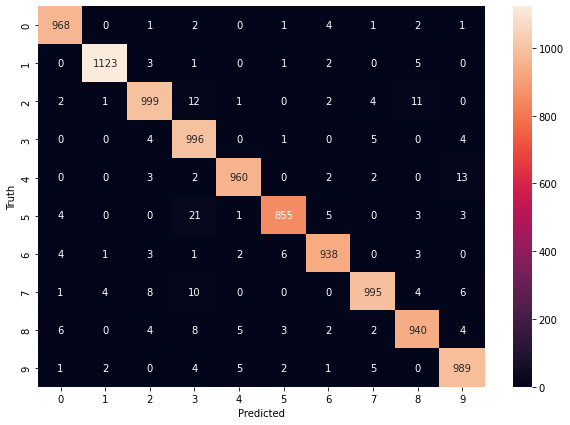

In [31]:
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
cm = tf.math.confusion_matrix(labels=y_test, predictions= y_pred_classes)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot= True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

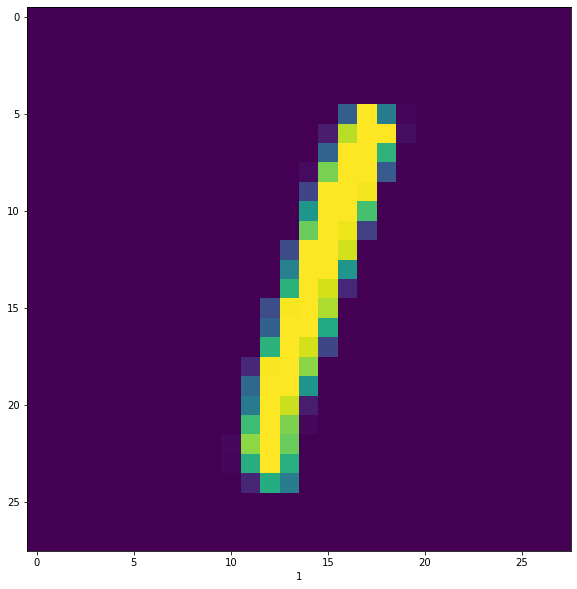

In [35]:
plot_sample(X_test, y_test, 5)

In [33]:
y_pred_classes[5]

1

**CNN model**

In [40]:
cnn = models.Sequential([
    layers.Conv2D(filters=10, kernel_size=(3,3),activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(100, activation="relu"),
    layers.Dense(10, activation="softmax")
])

cnn.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics= ['accuracy']
)

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1950 - accuracy: 0.9427
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0656 - accuracy: 0.9806
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0449 - accuracy: 0.9862
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0319 - accuracy: 0.9902
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0229 - accuracy: 0.9928
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0167 - accuracy: 0.9947
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0120 - accuracy: 0.9962
Epoch 8/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0104 - accuracy: 0.9964
Epoch 9/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0074 - accuracy: 0.9973
Epoch 10/10
1875/1875 [==============================] - 24s 13m

In [41]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0647 - accuracy: 0.9844


[0.06470378488302231, 0.9843999743461609]

313/313 [==============================] - 2s 6ms/step


Text(69.0, 0.5, 'Truth')

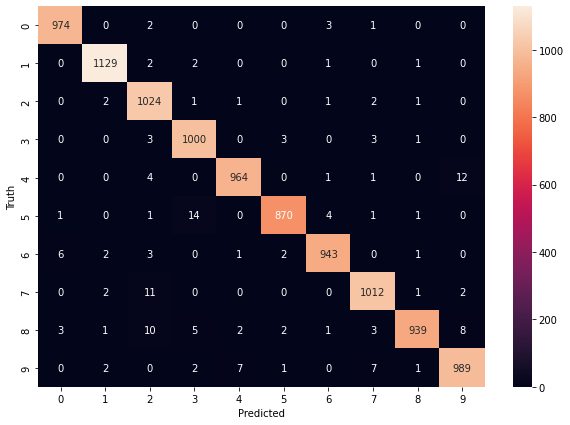

In [42]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
cm = tf.math.confusion_matrix(labels=y_test, predictions= y_pred_classes)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot= True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")